# 1.  Importing packages

In [67]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Libraries for data preparation and model building
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# 2. load the data

In [68]:
df = pd.read_csv('train_set.csv')
df_test_set = pd.read_csv('test_set.csv')

In [69]:
# the top 5 rows of the DataFrame
(df.head())

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


# 3. Exploratory Data Analysis (EDA)

In [70]:
# Find data statistics
(df.describe())

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [71]:
# Check for null values
(df.isnull().sum())

lang_id    0
text       0
dtype: int64

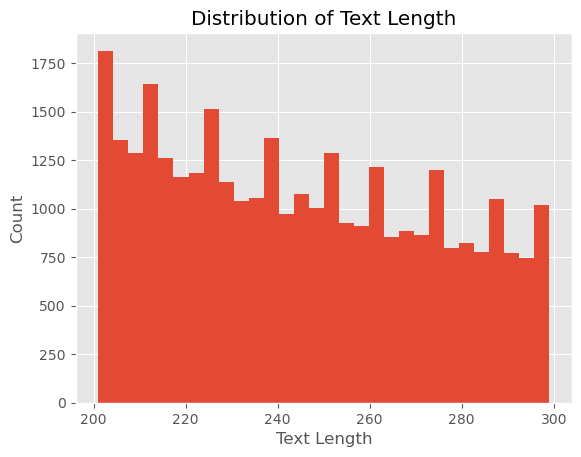

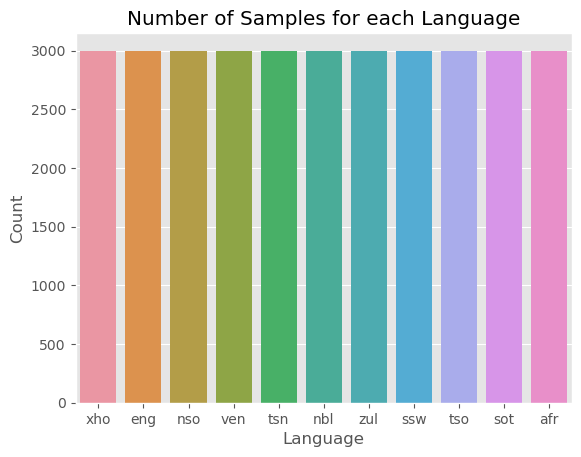

In [72]:
# Plot the distribution of text length
df['text_length'] = df['text'].apply(len)
plt.hist(df['text_length'], bins=30)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Text Length')
plt.show()

# Count the number of text samples for each language
sns.countplot(data=df, x='lang_id')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Number of Samples for each Language')
plt.show()


# 4. Data Engineering

In [73]:
# Drop duplicate rows if any
df_clean = df.drop_duplicates()
df_clean.duplicated().sum()

0

In [79]:
# Encode the target variable using LabelEncoder:
le = LabelEncoder()
df_clean.loc[: ,'lang_id'] = le.fit_transform(df_clean.loc[: ,'lang_id'])

# Split the data into features (X) and target variable (y):
X = df_clean['text']
y = df_clean['lang_id']

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\zamad\AppData\Local\Temp\ipykernel_21132\2670740194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[: ,'lang_id'] = le.fit_transform(df_clean.loc[: ,'lang_id'])


# 5. Model development

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

# Use CountVectorizer to convert text to vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Print the shape of the vectorized data
print("Training data shape after vectorization:", X_train_vec.shape)
print("Testing data shape after vectorization:", X_test_vec.shape)

# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict the language on testing set
y_pred = model.predict(X_test_vec)

# Evaluate the model using accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Training data shape after vectorization: (23958, 123943)
Testing data shape after vectorization: (5990, 123943)
Accuracy: 0.9984974958263773
F1 Score: 0.9984966414780161


# 6. Model training and testing

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Use CountVectorizer to convert text to vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Scale the vectorized features using MaxAbsScaler:
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

# Initialize and train a logistic regression model:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set:
y_pred = model.predict(X_test_scaled)

# Evaluate the model's accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9974958263772955
